In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
pd.set_option('display.max_rows',80)
pd.set_option('display.max_columns',80)
pd.set_option('max_colwidth',300)
sns.set_palette("Blues")
sns.set_style('whitegrid')

In [2]:
data=pd.read_csv('winequality.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
data.shape

(1599, 12)

In [7]:
data.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
data.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [9]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [10]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [11]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

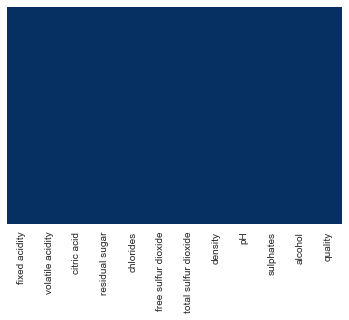

In [12]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='RdBu_r')

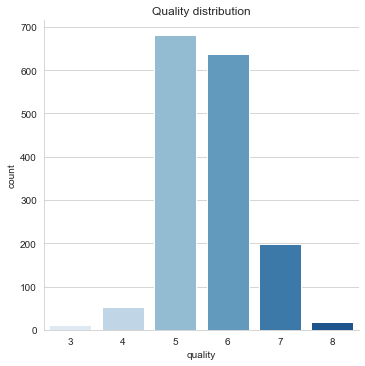

In [13]:
sns.catplot(x='quality', data=data, kind='count');
plt.title('Quality distribution');


In [14]:
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

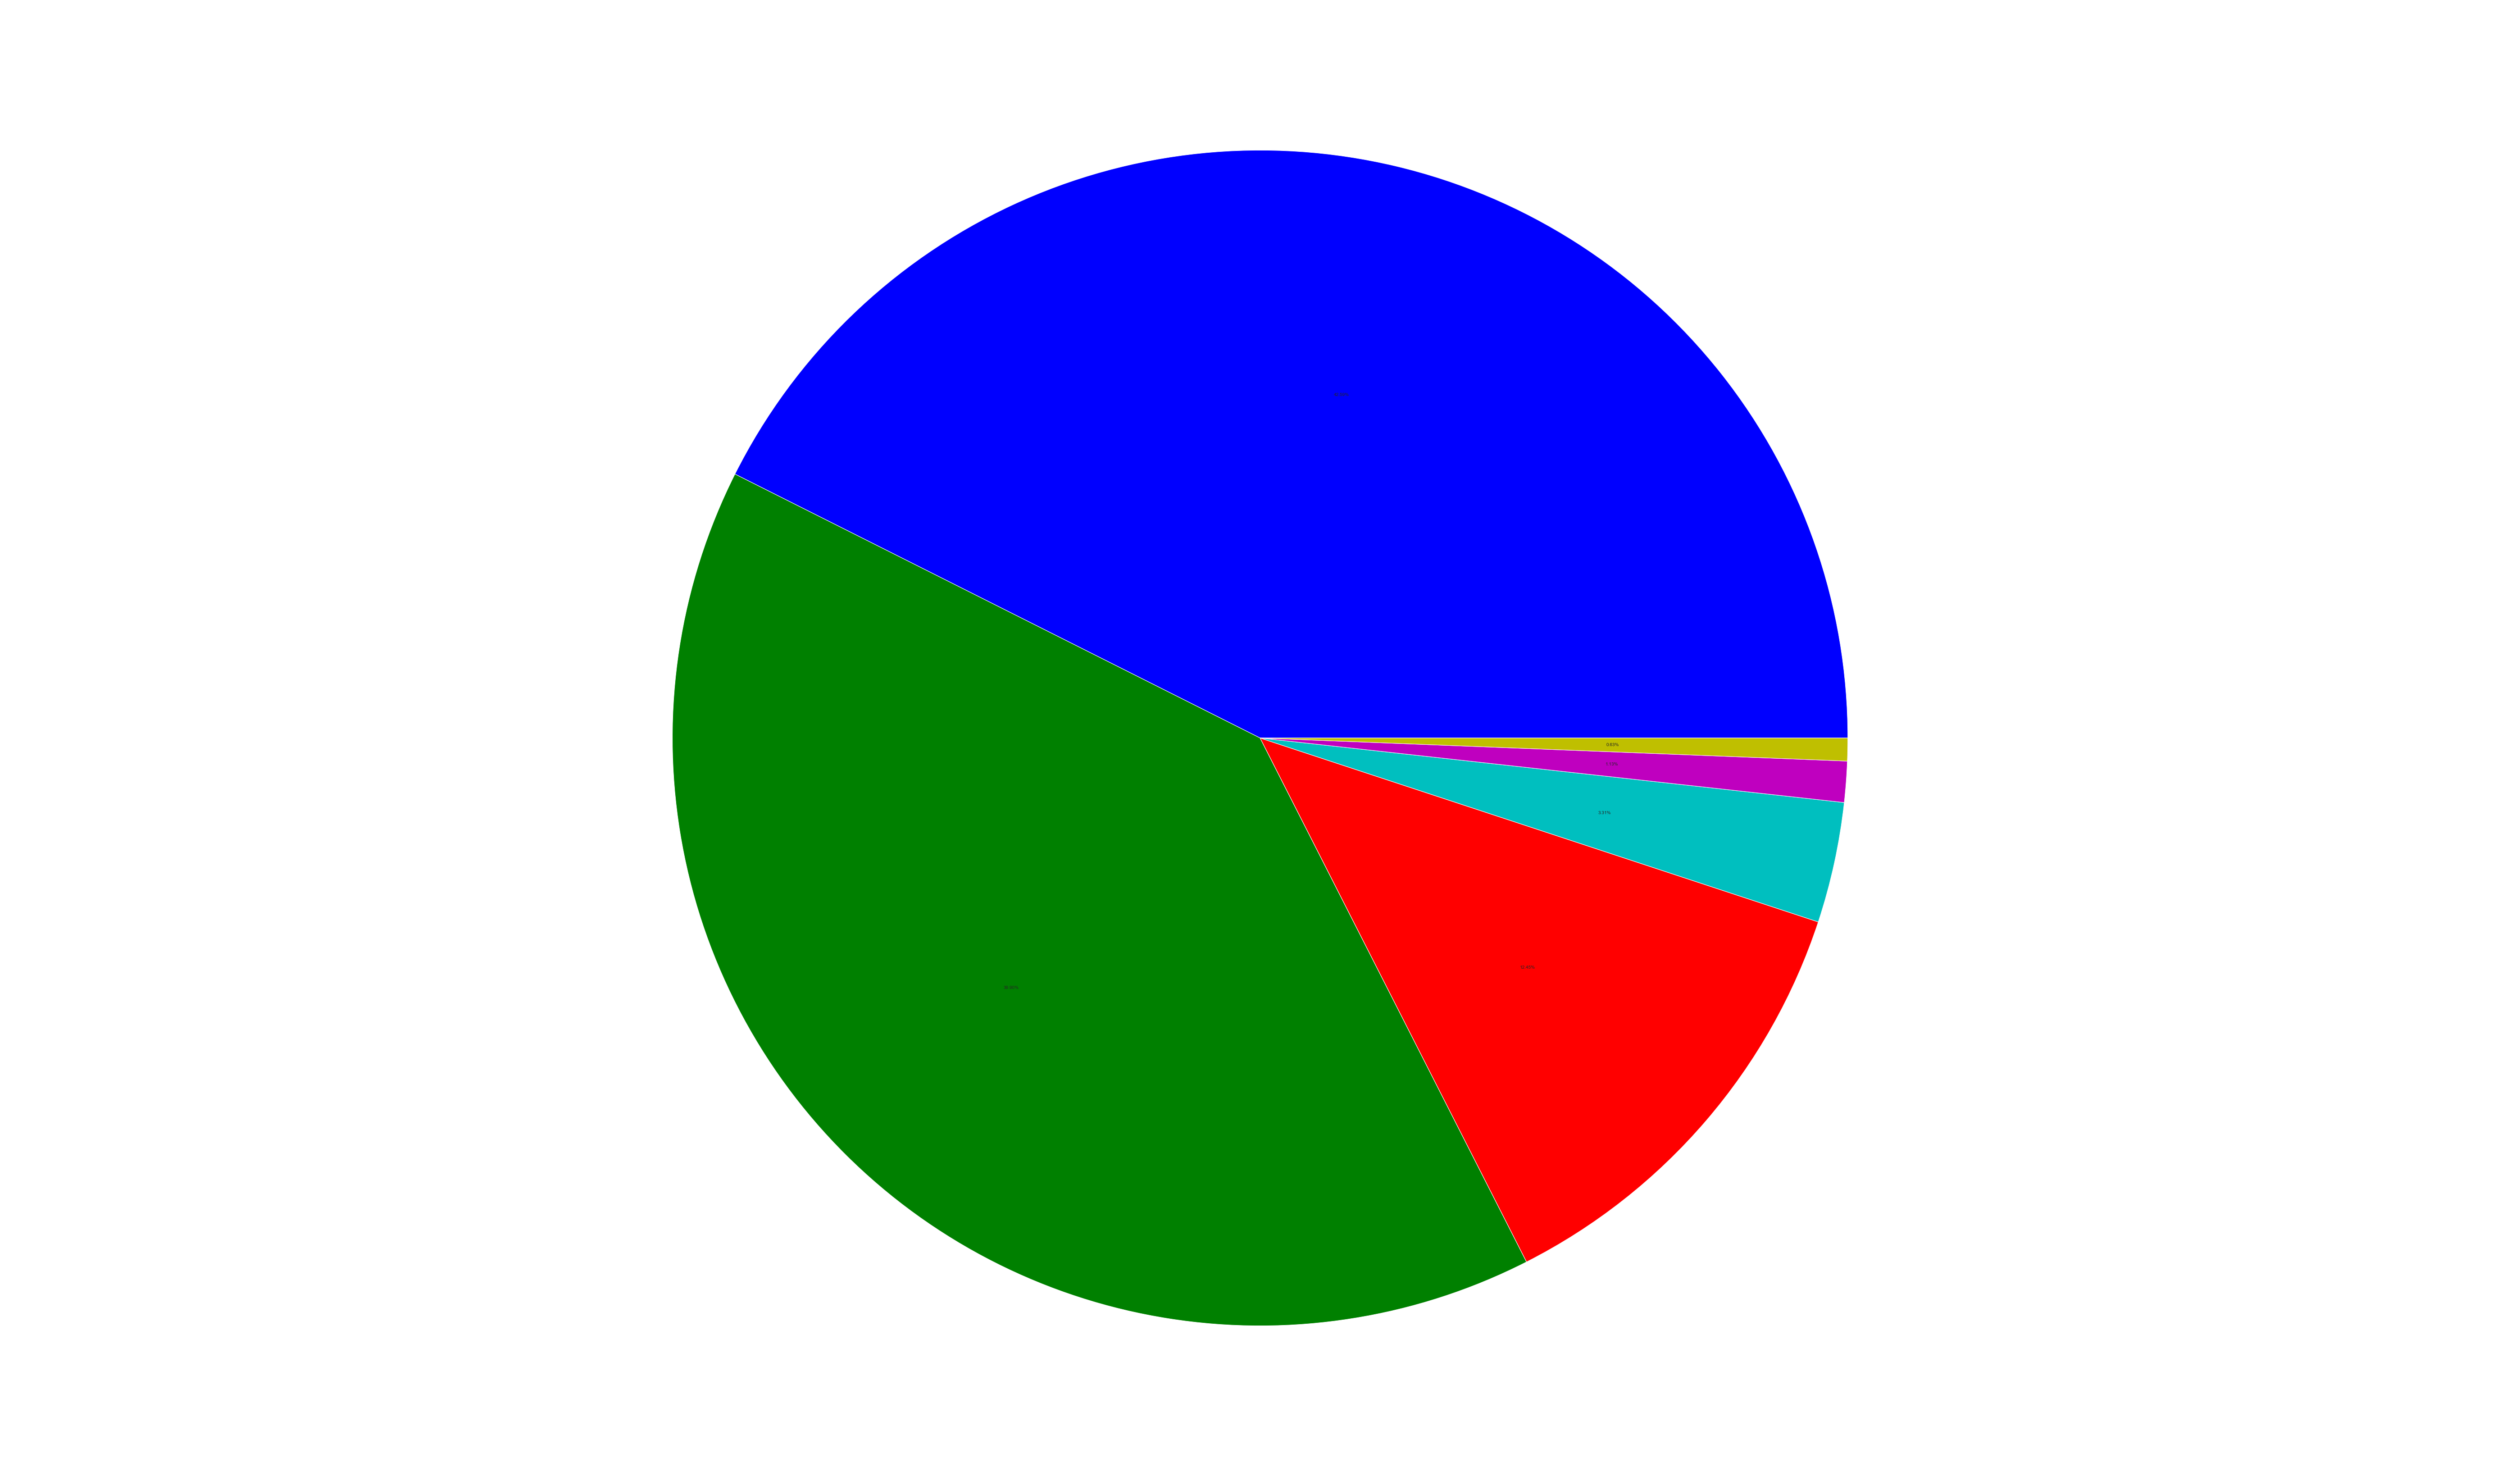

In [15]:
fig = plt.figure(1, figsize=(100,60))
ax = fig.add_subplot(111)
ax.axis('equal')
colors=('b', 'g', 'r', 'c', 'm', 'y', 'burlywood', 'w')
ax.pie(data.quality.value_counts(),colors=colors, autopct='%2.2f%%')
textprops = {"fontsize":40}

plt.show()

In [16]:
data.duplicated().sum()

240

In [17]:
data.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [18]:
wine= data.drop(['fixed acidity', 'volatile acidity', 'density', 'residual sugar', 'chlorides','total sulfur dioxide'], axis=1)

In [19]:
wine.head()

,citric acid,free sulfur dioxide,pH,sulphates,alcohol,quality
0,0.00,11.0,3.51,0.56,9.4,5
1,0.00,25.0,3.20,0.68,9.8,5
2,0.04,15.0,3.26,0.65,9.8,5
3,0.56,17.0,3.16,0.58,9.8,6
4,0.00,11.0,3.51,0.56,9.4,5


In [20]:
#Relationship Analysis

(6.1, -0.1)

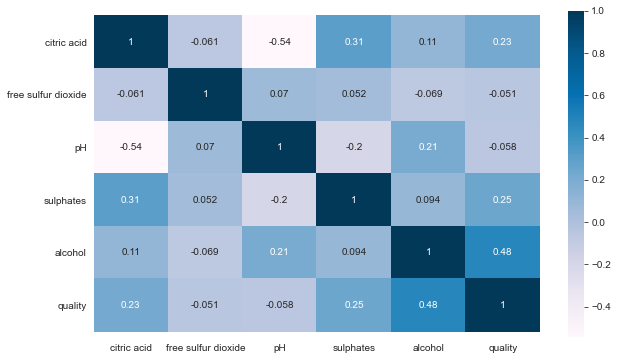

In [21]:
plt.figure(figsize=(10,6))
ax = sns.heatmap(wine.corr(), annot = True, cmap='PuBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.1, top - 0.1)

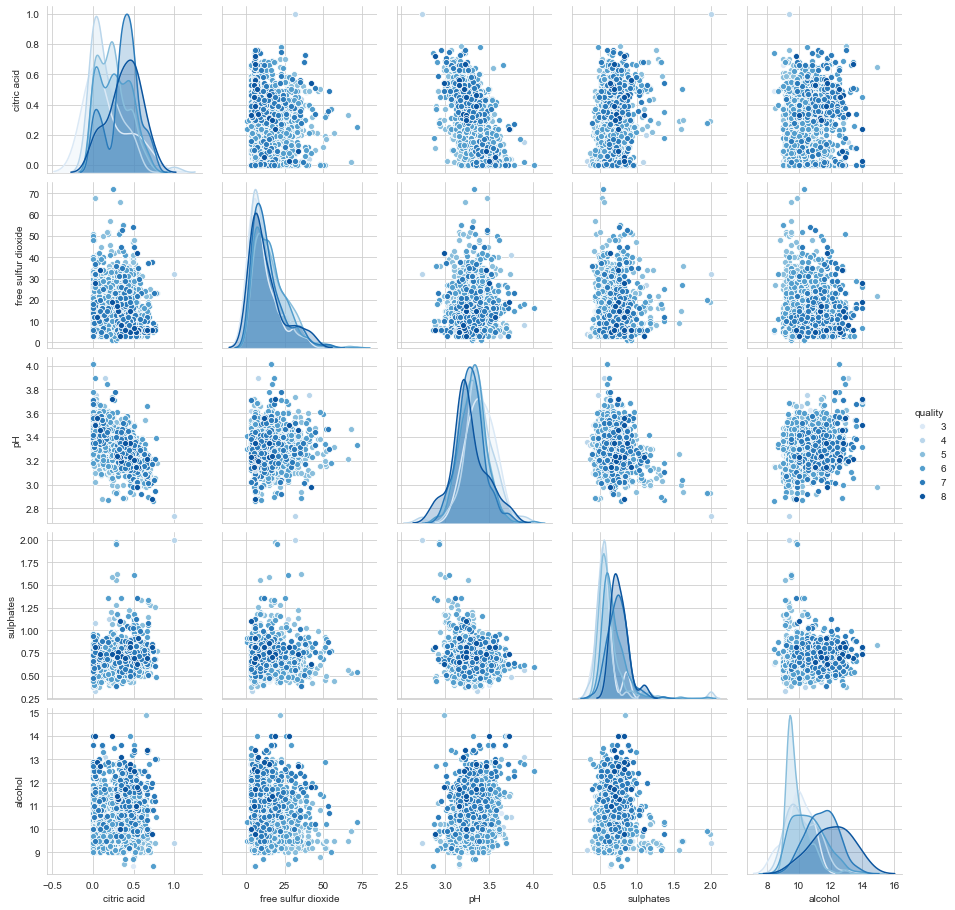

In [22]:
sns.pairplot(data=wine,hue = 'quality');

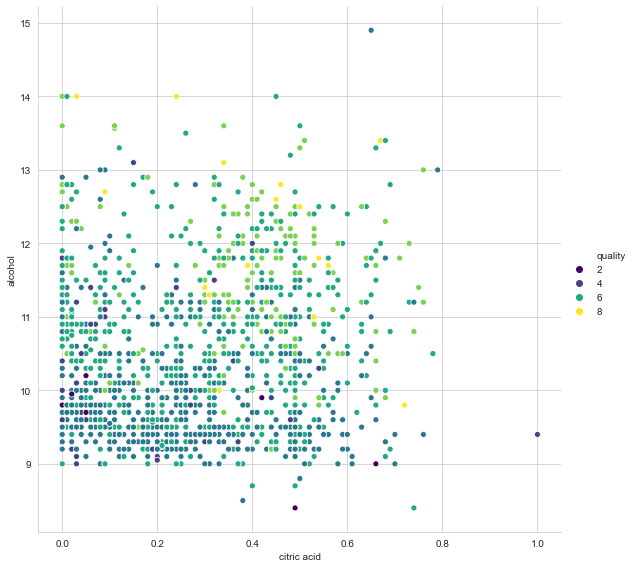

In [23]:
sns.relplot(x='citric acid', y='alcohol',  ci='sulphates', hue='quality',palette="viridis",data=wine, height=8, aspect=1,)


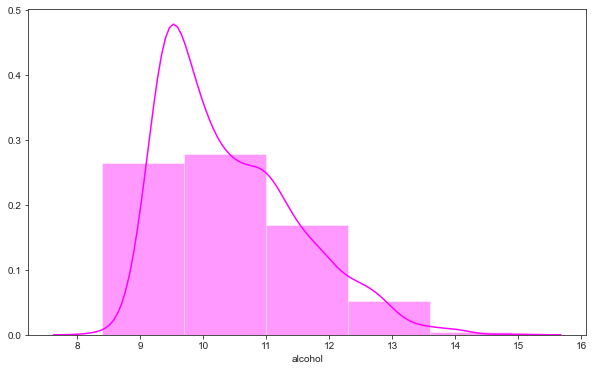

In [24]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
sns.distplot(wine['alcohol'],bins=5,color='magenta')

In [25]:
#Data Prepocessing

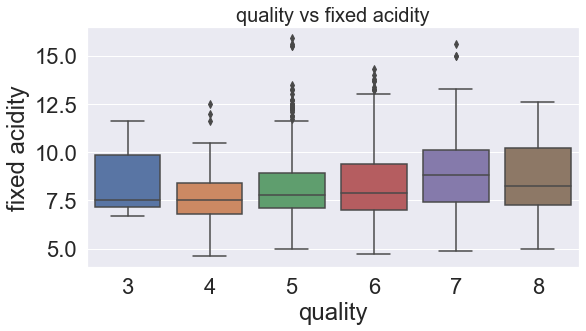

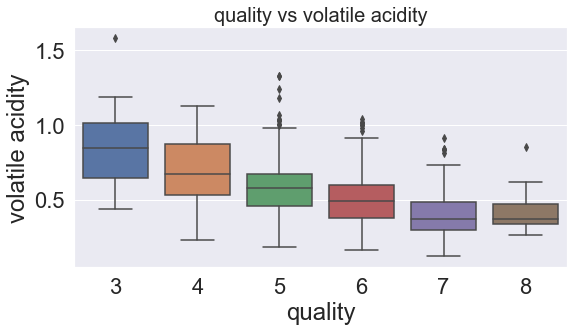

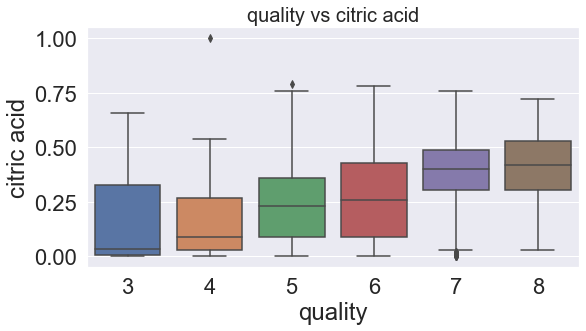

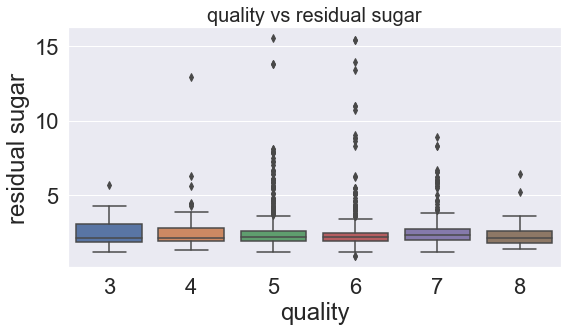

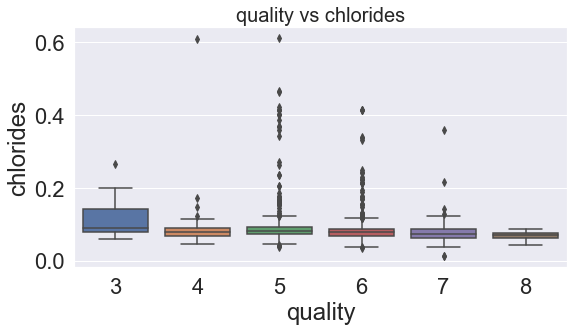

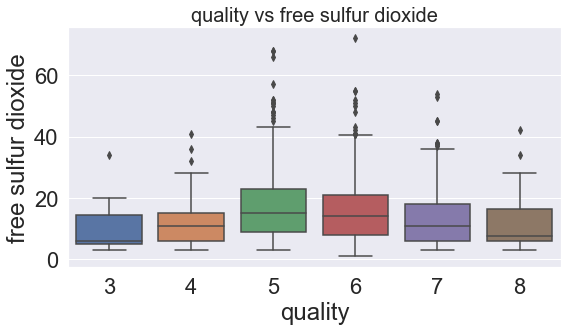

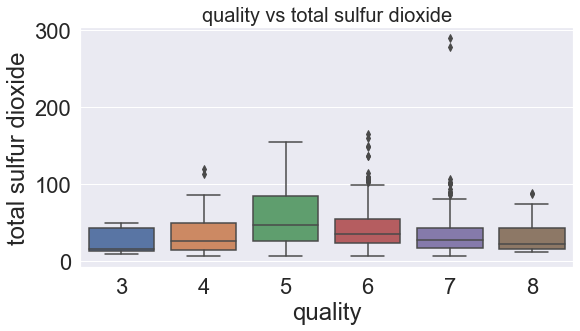

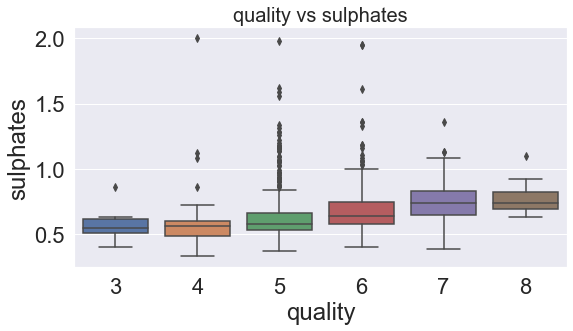

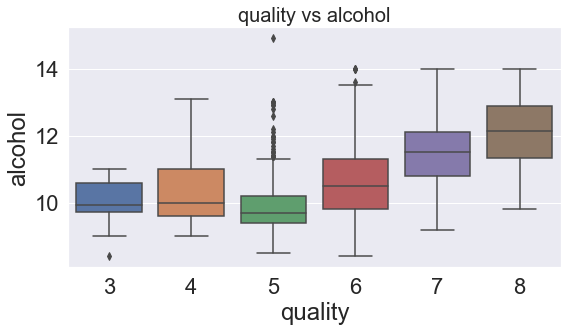

In [26]:
plt.figure(figsize=(30,15))
sns.set(font_scale=2)
plt.subplot(331)
plt.title('quality vs fixed acidity',fontsize=20)
sns.boxplot(x='quality',y='fixed acidity',data=data)

plt.figure(figsize=(30,15))
sns.set(font_scale=2)
plt.subplot(332)
plt.title('quality vs volatile acidity',fontsize=20)
sns.boxplot(x='quality',y='volatile acidity',data=data)

plt.figure(figsize=(30,15))
sns.set(font_scale=2)
plt.subplot(333)
plt.title('quality vs citric acid',fontsize=20)
sns.boxplot(x='quality',y='citric acid',data=data)

plt.figure(figsize=(30,15))
sns.set(font_scale=2)
plt.subplot(334)
plt.title('quality vs residual sugar',fontsize=20)
sns.boxplot(x='quality',y='residual sugar',data=data)


plt.figure(figsize=(30,15))
sns.set(font_scale=2)
plt.subplot(335)
plt.title('quality vs chlorides',fontsize=20)
sns.boxplot(x='quality',y='chlorides',data=data)

plt.figure(figsize=(30,15))
sns.set(font_scale=2)
plt.subplot(336)
plt.title('quality vs free sulfur dioxide',fontsize=20)
sns.boxplot(x='quality',y='free sulfur dioxide',data=data)

plt.figure(figsize=(30,15))
sns.set(font_scale=2)
plt.subplot(337)
plt.title('quality vs total sulfur dioxide',fontsize=20)
sns.boxplot(x='quality',y='total sulfur dioxide',data=data)

plt.figure(figsize=(30,15))
sns.set(font_scale=2)
plt.subplot(338)
plt.title('quality vs sulphates',fontsize=20)
sns.boxplot(x='quality',y='sulphates',data=data)

plt.figure(figsize=(30,15))
sns.set(font_scale=2)
plt.subplot(339)
plt.title('quality vs alcohol',fontsize=20)
sns.boxplot(x='quality',y='alcohol',data=data)



In [27]:
data.iloc[:,:11].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


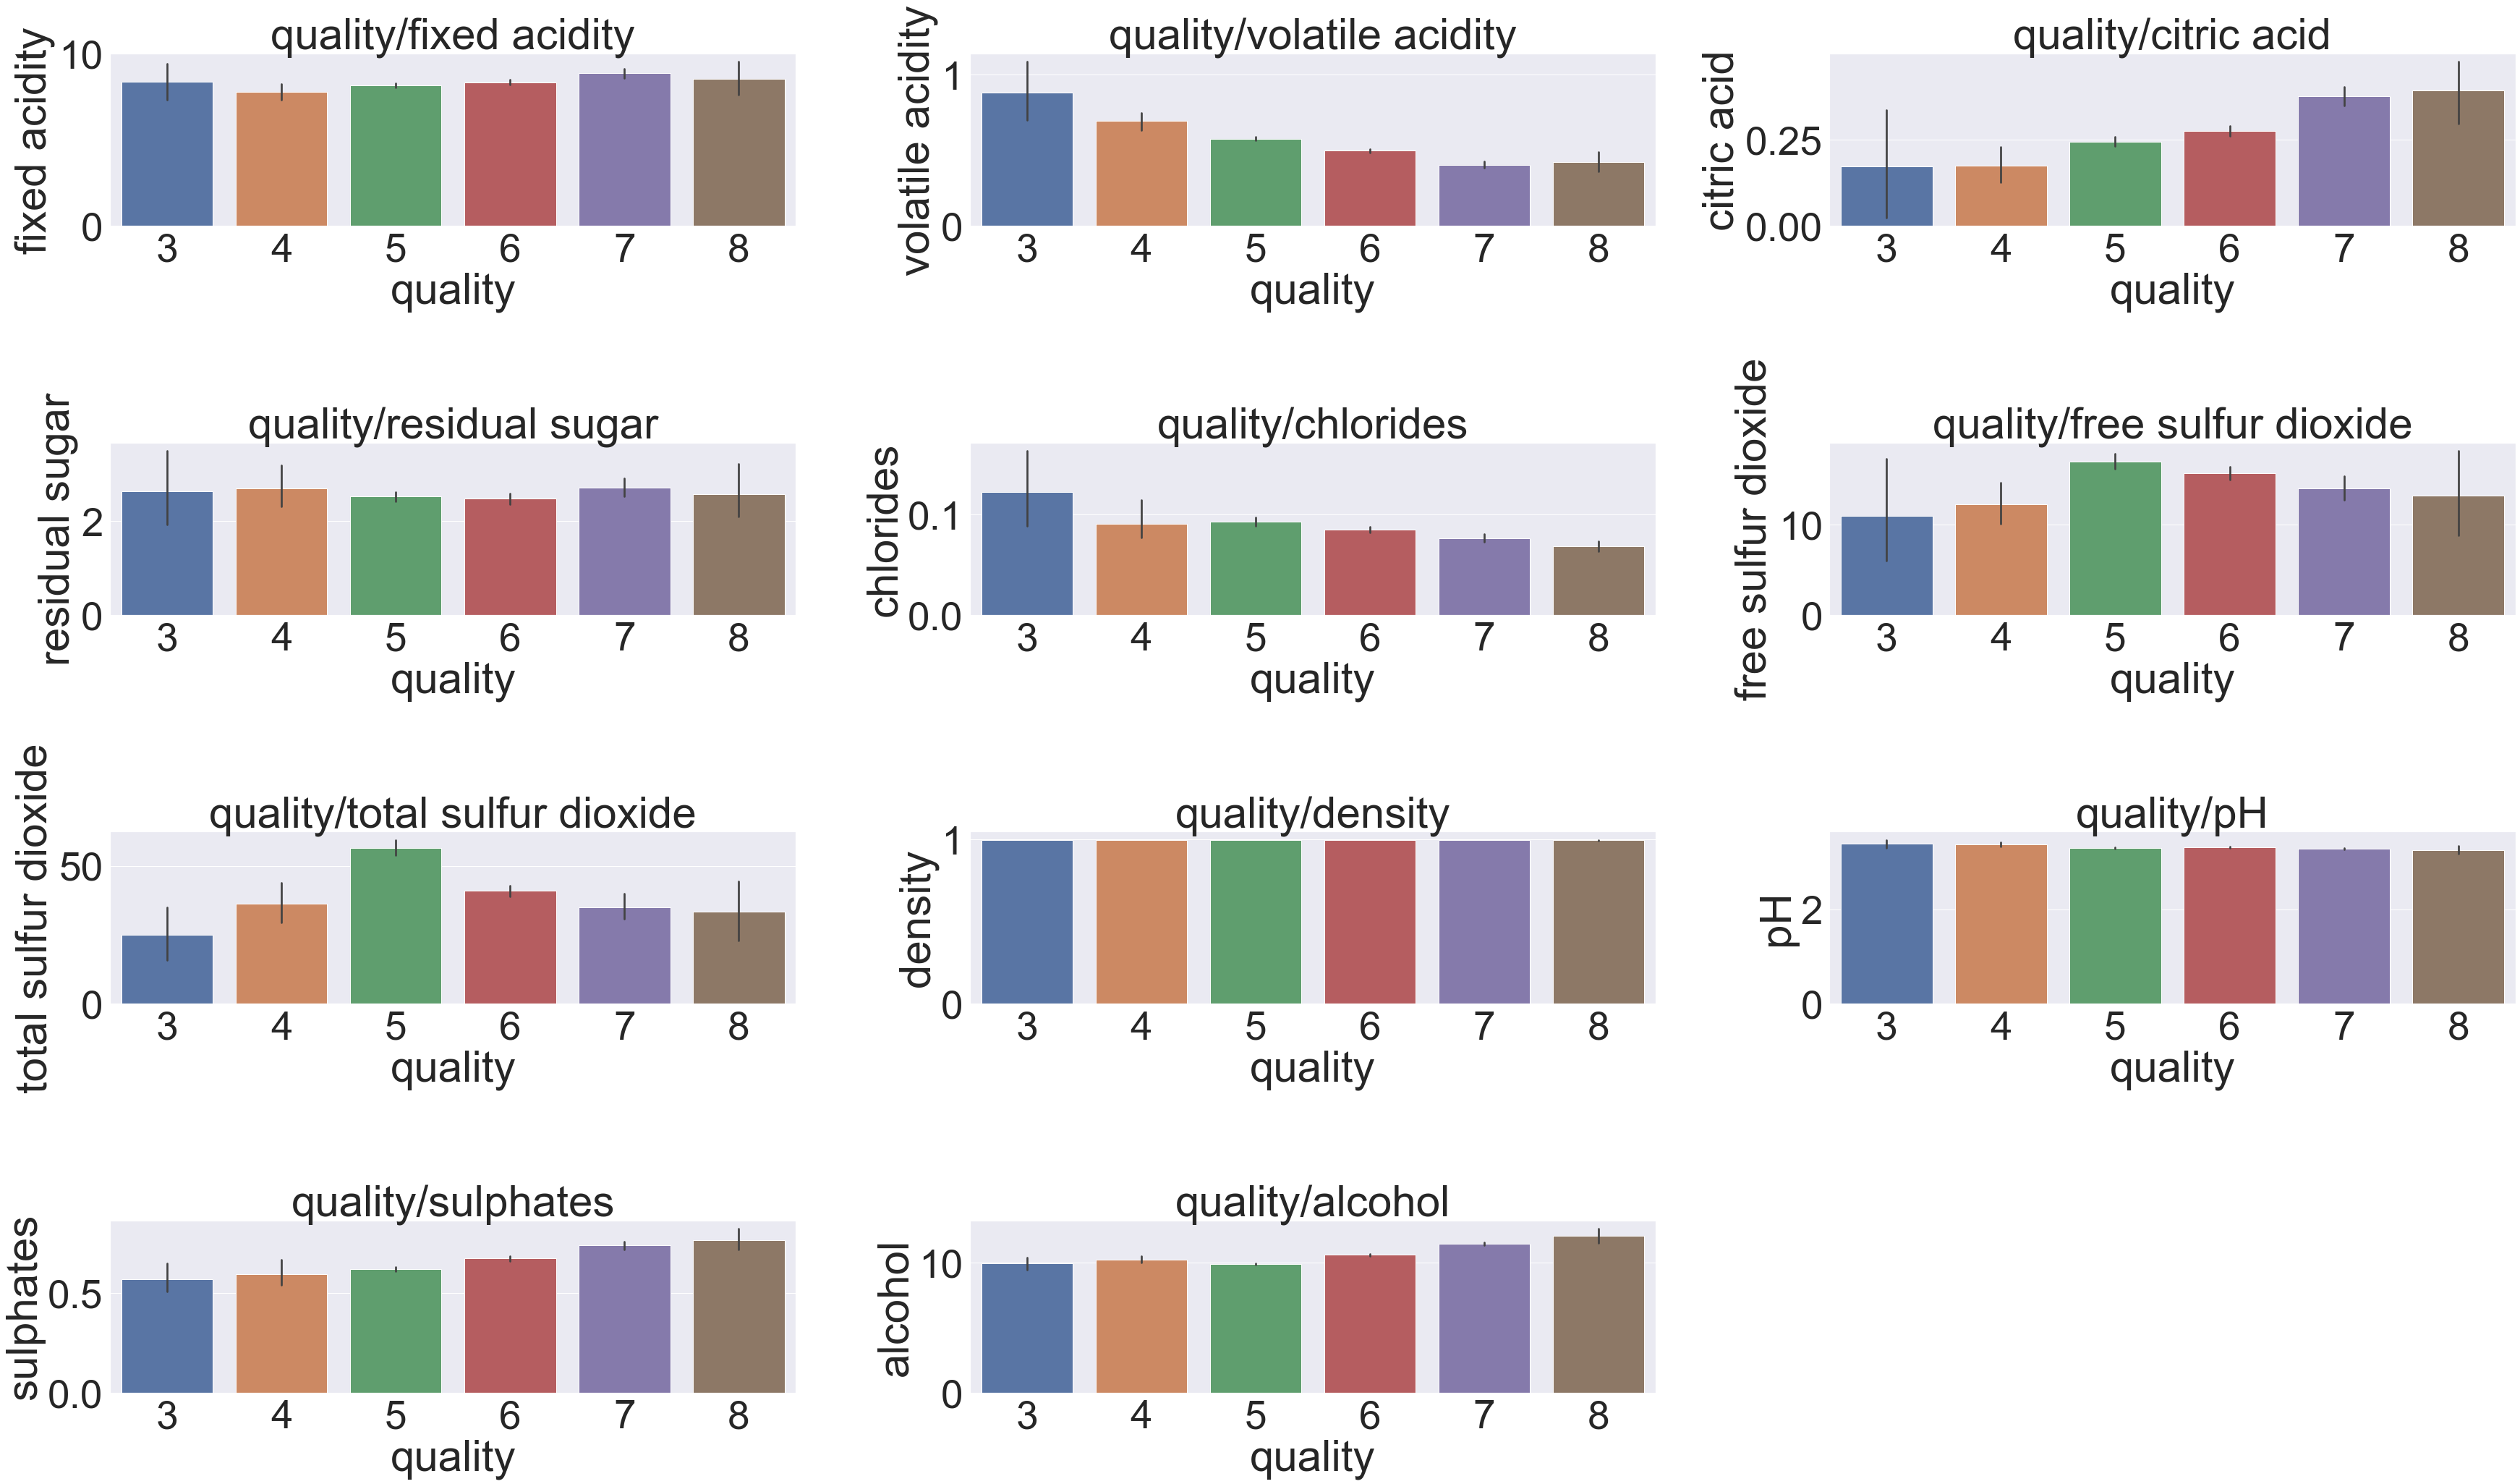

In [28]:
plt.figure(figsize=(50,30))
sns.set(font_scale=5)
for pl,col in enumerate(list(data.iloc[:,:11].columns.values)):
    plt.subplot(4,3,pl+1)
    sns.barplot(y= data[col],x='quality',data=data)
    plt.title(f'quality/{col}')
    plt.tight_layout()

In [29]:
from sklearn.preprocessing import LabelEncoder 

In [30]:
bins = (2,6,8)
wine_groups = ['low','high']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = wine_groups)

In [31]:
quality_label= LabelEncoder()

In [32]:
data['quality']= quality_label.fit_transform(data['quality'])

In [33]:
data['quality'].value_counts()

1    1382
0     217
Name: quality, dtype: int64

In [34]:
data.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,1
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,1
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,0
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,0
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,1


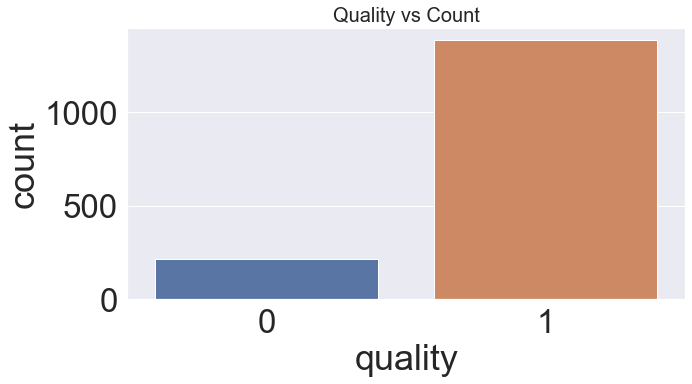

In [35]:
plt.figure(figsize=(10,5))
sns.set(font_scale=3)
plt.title('Quality vs Count',fontsize=20)
sns.countplot(data['quality'])

In [36]:
#Setting the values of X and Y

X =  data[['alcohol','density','sulphates','pH','free sulfur dioxide','citric acid']]
Y =  data['quality']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30,random_state=42)

In [39]:
X_train.head()

,alcohol,density,sulphates,pH,free sulfur dioxide,citric acid
925,11.0,0.99604,0.87,3.47,53.0,0.36
363,10.2,0.99880,0.87,2.99,6.0,0.63
906,11.0,0.99640,0.71,3.39,12.0,0.27
426,11.4,0.99490,0.49,3.49,19.0,0.08
1251,9.8,0.99630,0.59,3.28,27.0,0.14


In [40]:
y_train.head()

925     0
363     1
906     1
426     1
1251    1
Name: quality, dtype: int32

In [41]:
X_train.shape, X_test.shape

((1119, 6), (480, 6))

In [42]:
y_train.shape, y_test.shape

((1119,), (480,))

In [43]:
# Data Modelling

In [44]:
ss=StandardScaler()
X_train= ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [45]:
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [46]:
classifier = []
classifier.append(("LogisticReg", LogisticRegression(solver='liblinear',multi_class='ovr')))
classifier.append(("DecisionTree", DecisionTreeClassifier(criterion ='entropy')))
classifier.append(("KNN", KNeighborsClassifier()))
classifier.append(("KernelSVM", SVC(gamma='auto')))
classifier.append(("NaiveBayes", GaussianNB()))
classifier.append(("RandomForest", RandomForestClassifier()))


In [47]:
seed =0
results = []
names = []
scoring = 'accuracy'
for name, model in classifier:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


LogisticReg: 0.863683 (0.073755)
DecisionTree: 0.820511 (0.063129)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


KNN: 0.846164 (0.074731)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


KernelSVM: 0.859929 (0.085545)
NaiveBayes: 0.867421 (0.059730)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


RandomForest: 0.869933 (0.064493)


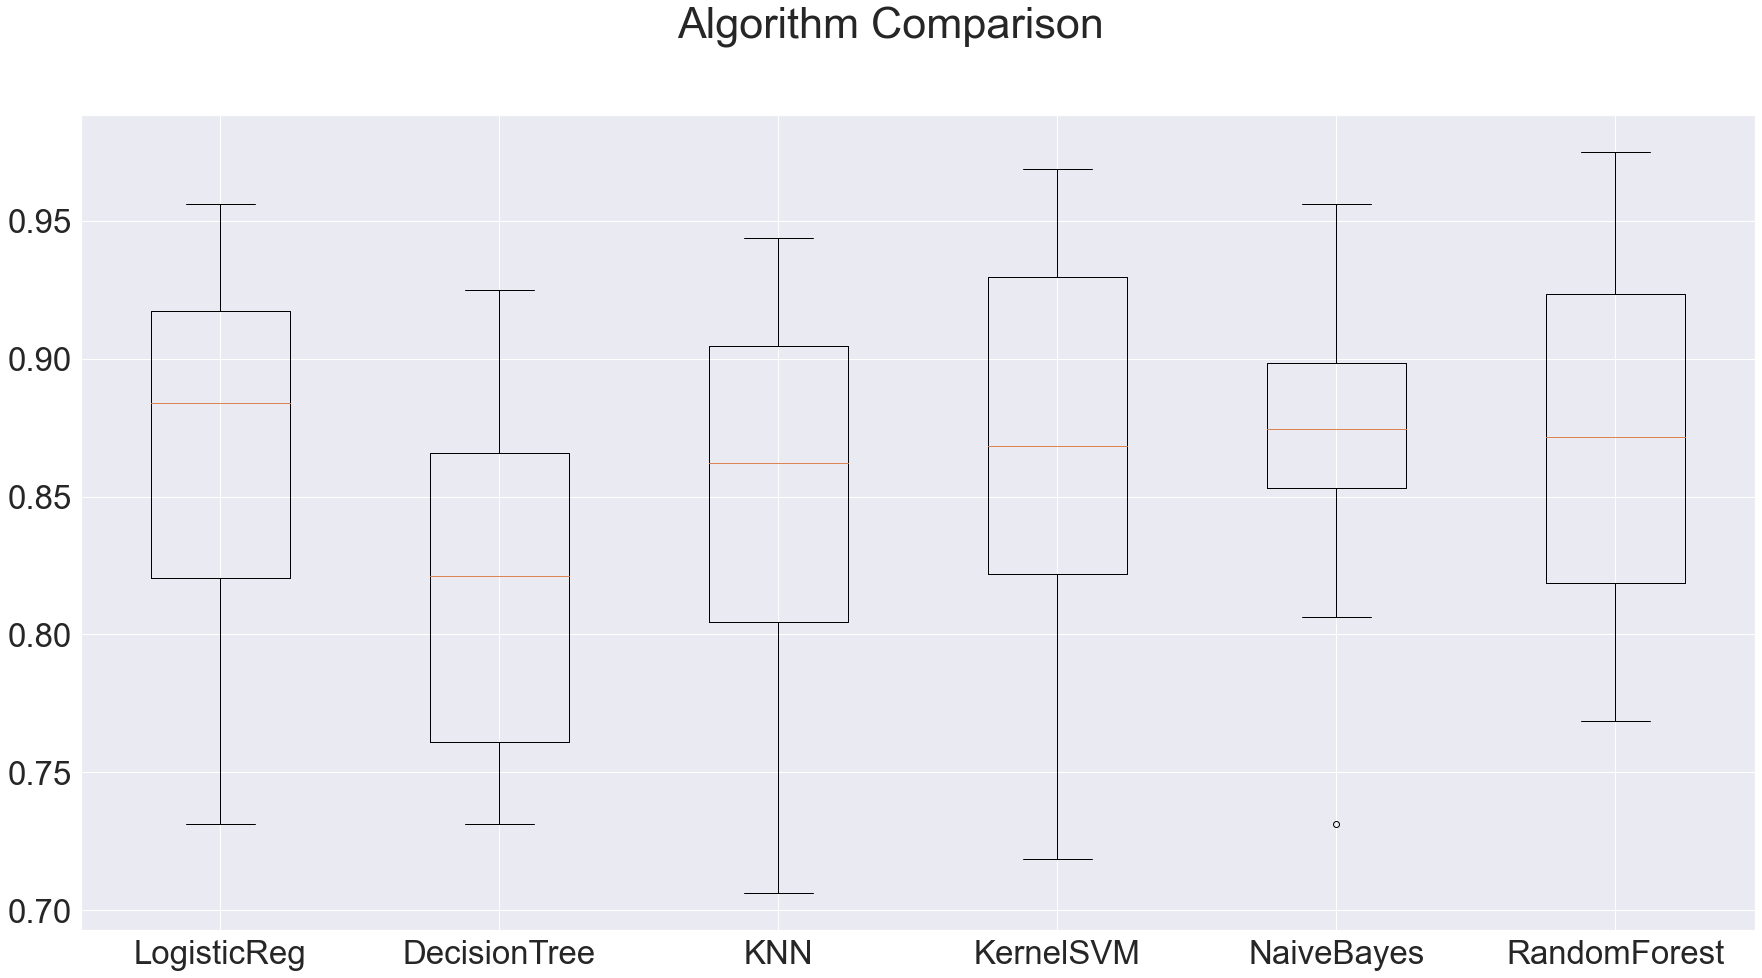

In [48]:
fig = plt.figure(figsize=(30,15))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [49]:
#Logistic Regression

logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [50]:
predictions=logreg.predict(X_test)
pd.DataFrame(predictions).head(20)

,0
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [51]:
y_pred = logreg.predict(X_test)

In [52]:
print(metrics.classification_report(y_test, y_pred, digits=3, zero_division = 1))

              precision    recall  f1-score   support

           0      0.520     0.194     0.283        67
           1      0.881     0.971     0.924       413

    accuracy                          0.863       480
   macro avg      0.701     0.582     0.603       480
weighted avg      0.831     0.863     0.834       480



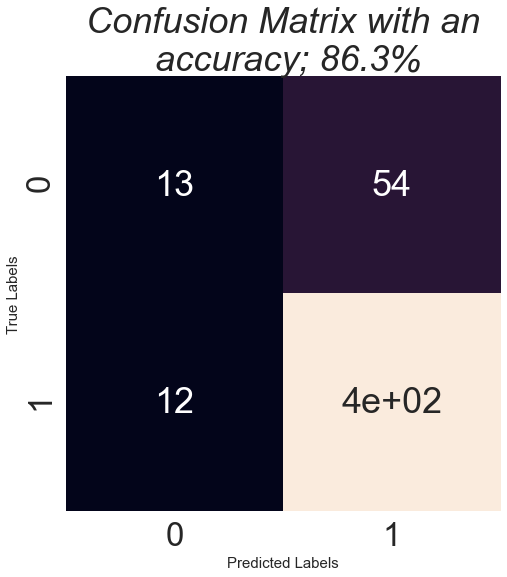

In [53]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.title('Confusion Matrix with an\n accuracy; 86.3%',fontstyle='italic')
plt.show()

In [54]:
cm = confusion_matrix(y_test, y_pred)
accuracyscore=accuracy_score(y_test, y_pred)
accuracyscore
print(accuracyscore*100)

86.25


In [55]:
#RANDOM FOREST

Rand_forest = RandomForestClassifier(n_estimators=100)
Rand_forest.fit(X_train, y_train)

RandomForestClassifier()

In [56]:
y_pred = Rand_forest.predict(X_test)
print(metrics.classification_report(y_test, y_pred.round(), digits=3))

              precision    recall  f1-score   support

           0      0.551     0.403     0.466        67
           1      0.907     0.947     0.927       413

    accuracy                          0.871       480
   macro avg      0.729     0.675     0.696       480
weighted avg      0.857     0.871     0.862       480



In [57]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [58]:
confusionmatrix=confusion_matrix(y_test, y_pred)
confusionmatrix

array([[ 27,  40],
       [ 22, 391]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix with an\n accuracy; 87.1%')

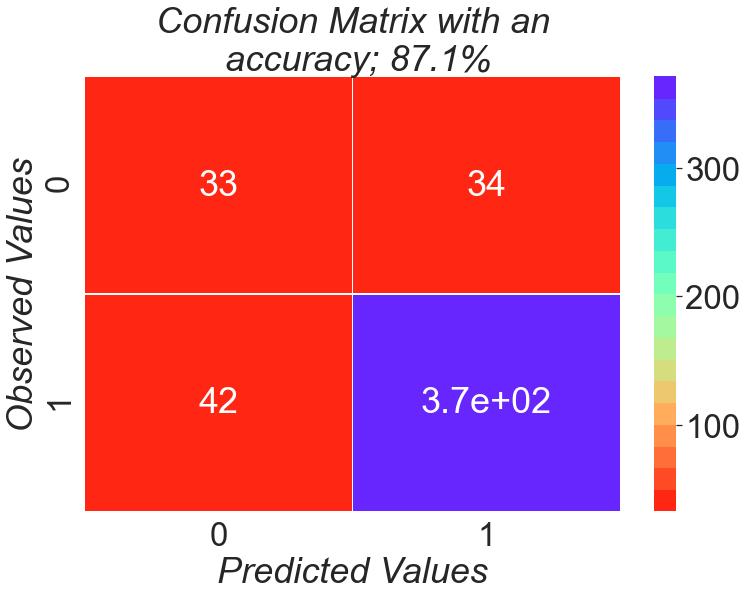

In [66]:
cm = confusion_matrix(y_test, y_pred)
cmap=sns.mpl_palette('rainbow_r',20)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, cmap=cmap,annot=True,linewidths=0.3)
plt.ylabel('Observed Values',fontstyle='italic')
plt.xlabel('Predicted Values',fontstyle='italic')
plt.title('Confusion Matrix with an\n accuracy; 87.1%',fontstyle='italic')

In [60]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

In [61]:
d_tree = DecisionTreeClassifier(random_state=0)
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [62]:
y_pred = d_tree.predict(X_test)

In [63]:
print(metrics.classification_report(y_test, y_pred.round(), digits=3))

              precision    recall  f1-score   support

           0      0.440     0.493     0.465        67
           1      0.916     0.898     0.907       413

    accuracy                          0.842       480
   macro avg      0.678     0.695     0.686       480
weighted avg      0.850     0.842     0.845       480



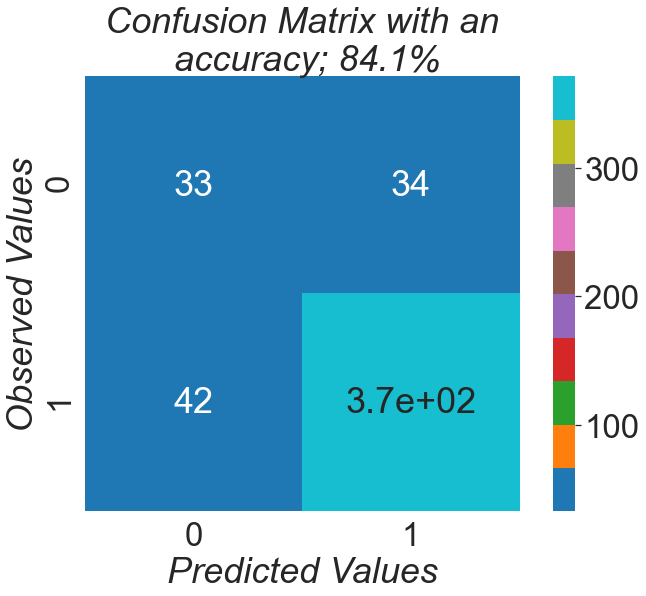

In [64]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm,cmap='tab10', square=True, annot=True, cbar=True)
plt.ylabel('Observed Values',fontstyle='italic')
plt.xlabel('Predicted Values',fontstyle='italic')
plt.title('Confusion Matrix with an\n accuracy; 84.1%',fontstyle='italic')
plt.show()


In [65]:
accuracyscore=accuracy_score(y_test, y_pred)
accuracyscore
print(accuracyscore*100)

84.16666666666667


# CONCLUSION: In this wine quality project, I used  Logistic Regression, Random Forest and Decision Tree and i got predicted accuracy scores of 86.2%,87.1% and 84.1%respectively. This shows that evaluating the model with Random Forest is advantageous because it has a better accuracy than other classification algorithms.


This